<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
Exploratory data analysis
</div>

# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import math
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv("../data/student_processed.csv")
df.head(5)

,School,Sex,Age,Address,Family size,Parent's cohabitation status,Mother's education,Father's education,Mother's job,Father's job,...,Family relationships,Free time at school,Going out with friends,Workday alcohol consumption,Weekend alcohol consumption,Current health status,School absences,First period grade,Second period grade,Final grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# Question: Do parents' background affect their children grading in school? 

In order to answer this question, I will find out if there is any pattern between columns of parents' aspect compared to the grade of student in school.

I will filter the needed columns from `df` and place them in a new DataFrame.

I will do the progress separately between Father and Mother.

In [3]:
col_needed = ["Parent's cohabitation status", "Mother's education", "Father's education",
              "Mother's job", "Father's job", "Family education support", "Family relationships",
              "First period grade", "Second period grade", "Final grade"]

Q1_df = df[col_needed]
Q1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Parent's cohabitation status  649 non-null    object
 1   Mother's education            649 non-null    int64 
 2   Father's education            649 non-null    int64 
 3   Mother's job                  649 non-null    object
 4   Father's job                  649 non-null    object
 5   Family education support      649 non-null    object
 6   Family relationships          649 non-null    int64 
 7   First period grade            649 non-null    int64 
 8   Second period grade           649 non-null    int64 
 9   Final grade                   649 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 50.8+ KB


## Column with non-numeric dtype:  

In [4]:
def calculate_distribution(series):
    value_counts = series.value_counts()
    return value_counts.to_dict()

agg_result = Q1_df.select_dtypes(exclude=['number']).agg(['nunique', calculate_distribution])

single_cate_profile_Q1 = agg_result.transpose()

single_cate_profile_Q1.columns = ['num_diff_vals', 'distribution']

single_cate_profile_Q1 = single_cate_profile_Q1.transpose()

single_cate_profile_Q1

,Parent's cohabitation status,Mother's job,Father's job,Family education support
num_diff_vals,2,5,5,2
distribution,"{'T': 569, 'A': 80}","{'other': 258, 'services': 136, 'at_home': 135...","{'other': 367, 'services': 181, 'at_home': 42,...","{'yes': 398, 'no': 251}"


We will compared the **mean** and **median** of grading columns by each attribute of columns.

### Parents' cohabitation status

In [5]:
def mode(df: pd.DataFrame):
    mode = df.mode()
    return mode.loc[0]

PcoSta_df = Q1_df[["Parent's cohabitation status", "First period grade", 
                   "Second period grade", "Final grade"]]

 > Data of student have Parent's cohabitation status is `A` - Apart:

In [6]:
PcoSta_df_A = PcoSta_df[PcoSta_df["Parent's cohabitation status"] == 'A']
PcoSta_df_A_stat = PcoSta_df_A.select_dtypes(include=['number']).agg(['mean', mode])
PcoSta_df_A_stat

,First period grade,Second period grade,Final grade
mean,11.2875,11.425,11.9125
mode,12.0000,11.000,11.0000


> Data of student have Parent's cohabitation status is `T` - Together:

In [7]:
PcoSta_df_T = PcoSta_df[PcoSta_df["Parent's cohabitation status"] == 'T']
PcoSta_df_T_stat = PcoSta_df_T.select_dtypes(include=['number']).agg(['mean', mode])
PcoSta_df_T_stat

,First period grade,Second period grade,Final grade
mean,11.414763,11.59051,11.905097
mode,10.000000,11.00000,11.000000


> Bar chart compare the mean of grade:

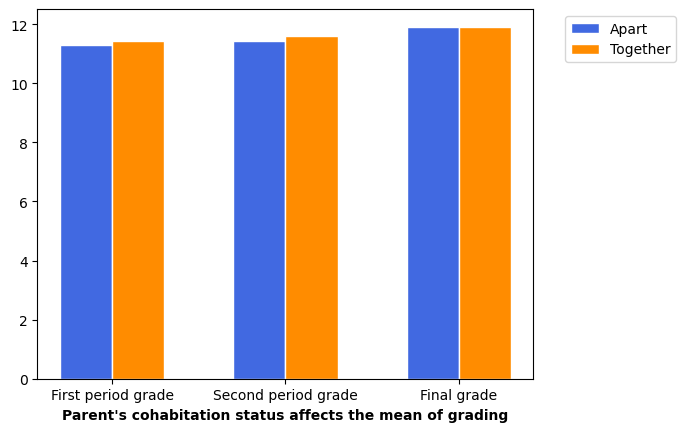

In [8]:
fig, ax = plt.subplots()
barWidth = 0.3

r1 = np.arange(len(PcoSta_df_A_stat.loc['mean']))
r2 = [x + barWidth for x in r1]

ax.bar(r1, PcoSta_df_A_stat.loc['mean'].values, color='royalblue', 
       width=barWidth, edgecolor='white', 
       label="Apart")
ax.bar(r2, PcoSta_df_T_stat.loc['mean'].values, color='darkorange', 
       width=barWidth, edgecolor='white', 
       label="Together")

plt.xlabel("Parent's cohabitation status affects the mean of grading", fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(3)], 
           PcoSta_df_A_stat.columns.tolist())

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

> Bar chart compare the mode of grade:

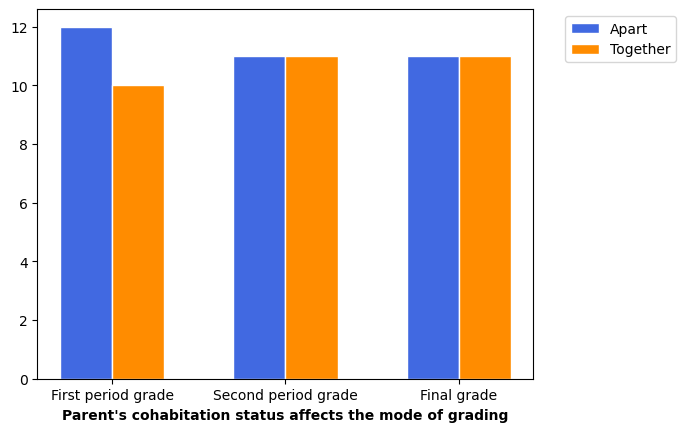

In [9]:
fig, ax = plt.subplots()
barWidth = 0.3

r1 = np.arange(len(PcoSta_df_A_stat.loc['mode']))
r2 = [x + barWidth for x in r1]

ax.bar(r1, PcoSta_df_A_stat.loc['mode'].values, color='royalblue', 
       width=barWidth, edgecolor='white', 
       label="Apart")
ax.bar(r2, PcoSta_df_T_stat.loc['mode'].values, color='darkorange', 
       width=barWidth, edgecolor='white', 
       label="Together")

plt.xlabel("Parent's cohabitation status affects the mode of grading", fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(3)], 
           PcoSta_df_A_stat.columns.tolist())

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

From the data and the bar charts, we can observe that: 

> There are almost no difference in the mean score. Although there is a slight differece in mode in score at the `First period grade` but it remain a common value in each of two other columns.

> We can now conclude that Parent's cohabitation status does not impact on their childern grading in Portugese at school.

### Parents' job
We will compare the pattern of the histogram of general grade with grade based on specific job of each mother and father 

In [10]:
col_needed = ["Mother's job" , "Father's job", 
              "First period grade", "Second period grade", "Final grade"]
grade_col = ["First period grade", "Second period grade", "Final grade"]

Q2_df = df[col_needed]
Q2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Mother's job         649 non-null    object
 1   Father's job         649 non-null    object
 2   First period grade   649 non-null    int64 
 3   Second period grade  649 non-null    int64 
 4   Final grade          649 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 25.5+ KB


Histogram for granding columns:

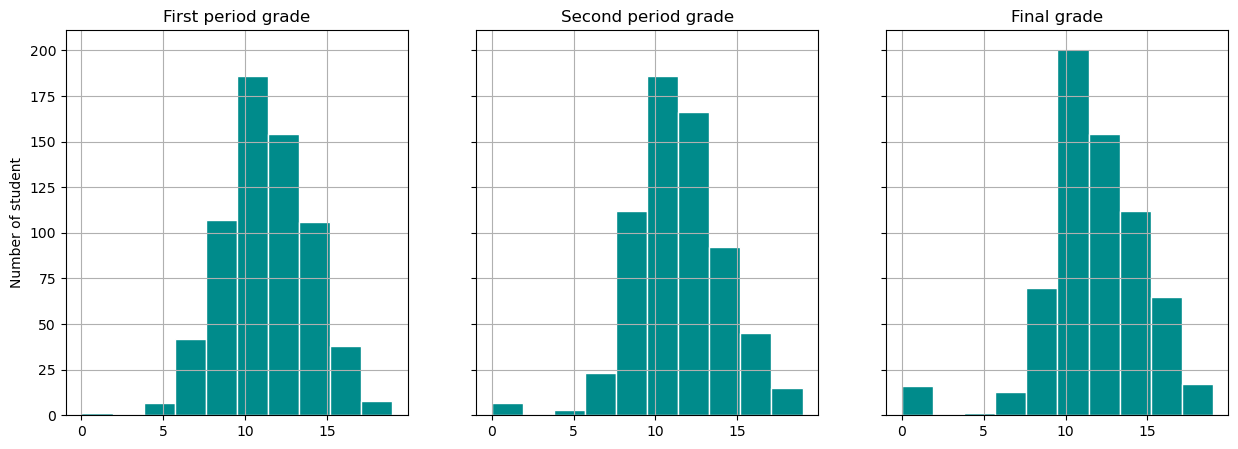

In [11]:
Q2_df[grade_col].plot(kind = 'hist', 
                        subplots = True,
                        ylabel = 'Number of student',
                        layout = (1, 3), 
                        figsize = (15, 5), 
                        bins = 10, 
                        grid = True,
                        sharey=True, 
                        sharex=False,
                        title = grade_col,
                        legend = False,
                        color =  "darkcyan",
                        edgecolor = 'white')
plt.show()

In [12]:
agg_result = Q2_df.select_dtypes(exclude=['number']).agg(['nunique', calculate_distribution])

single_cate_profile_Q2 = agg_result.transpose()

single_cate_profile_Q2.columns = ['num_diff_vals', 'distribution']

single_cate_profile_Q2 = single_cate_profile_Q2.transpose()

single_cate_profile_Q2

,Mother's job,Father's job
num_diff_vals,5,5
distribution,"{'other': 258, 'services': 136, 'at_home': 135...","{'other': 367, 'services': 181, 'at_home': 42,..."


- Mother's job:

We will look for the distribution of student's score based on their Mother's job

In [13]:
MoJo = Q2_df["Mother's job"].unique().tolist()
MoJo

['at_home', 'health', 'other', 'services', 'teacher']

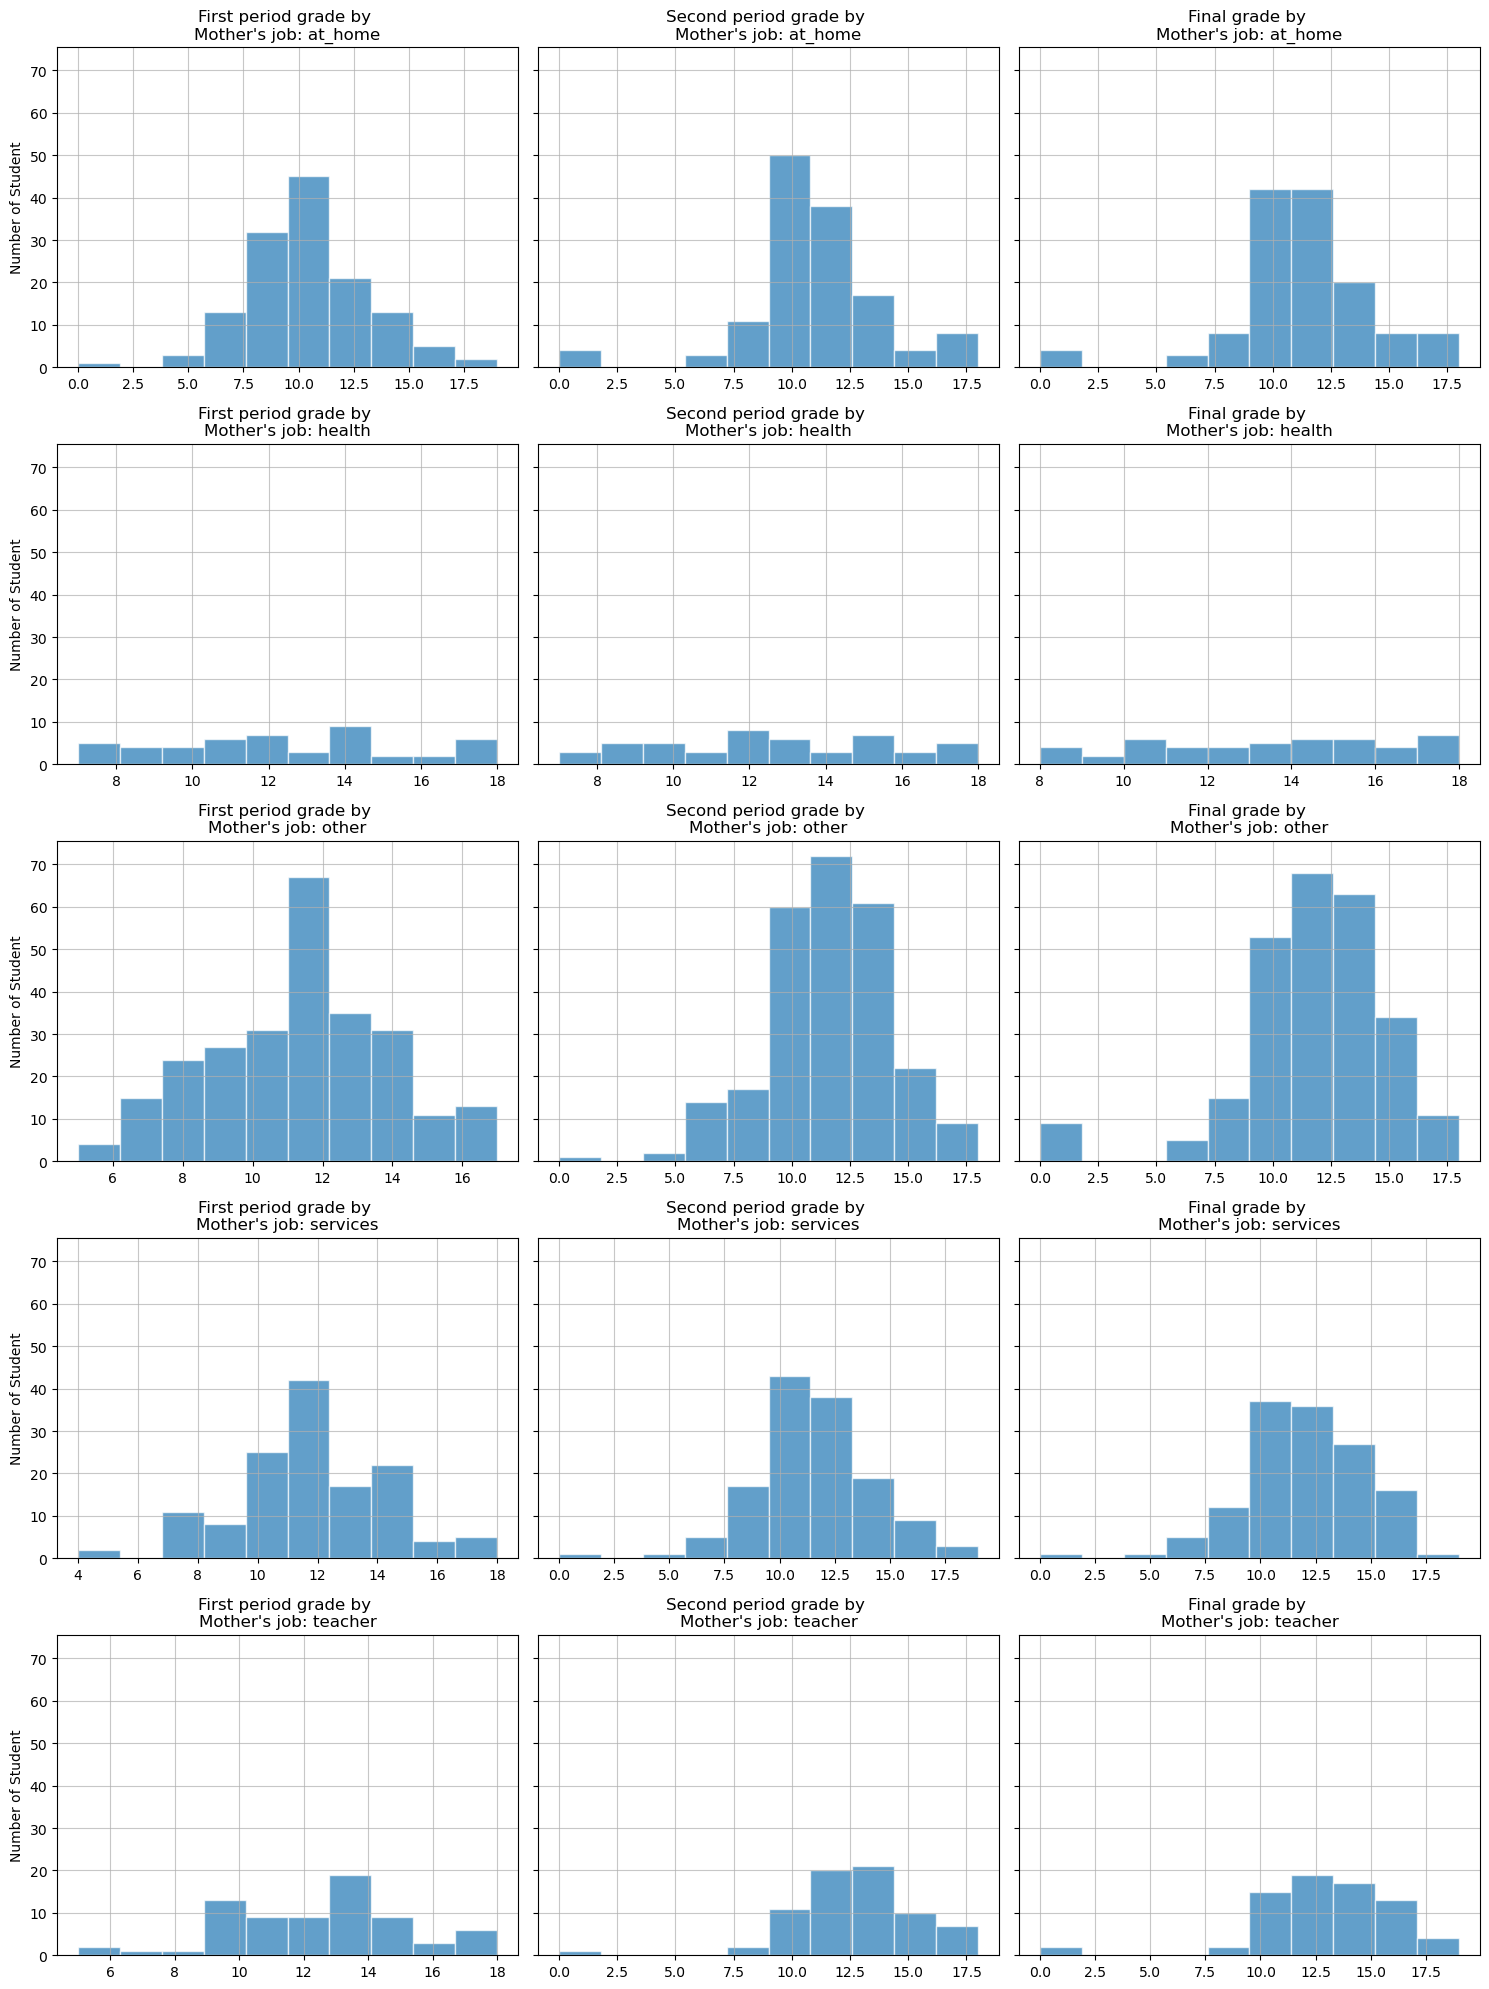

In [14]:
num_rows = 5
num_cols = 3

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20), sharey=True, tight_layout=True)
axes = axes.flatten()

i = 0
for job in MoJo:
    draw_df = Q2_df[Q2_df["Mother's job"] == job]
    axes[i].set_ylabel('Number of Student')
    for grade in grade_col:
        num_bins = math.ceil(math.sqrt(draw_df[grade].nunique()))
        axes[i].hist(draw_df[grade].fillna(0),bins=10, alpha=0.7, edgecolor = 'white')
        axes[i].set_title(f"{grade} by \nMother's job: {job}")
        axes[i].grid(axis='both', linestyle='-', alpha=0.7)
        i += 1
    


- Father's job:

In [15]:
FaJo = Q2_df["Father's job"].unique().tolist()
FaJo

['teacher', 'other', 'services', 'health', 'at_home']

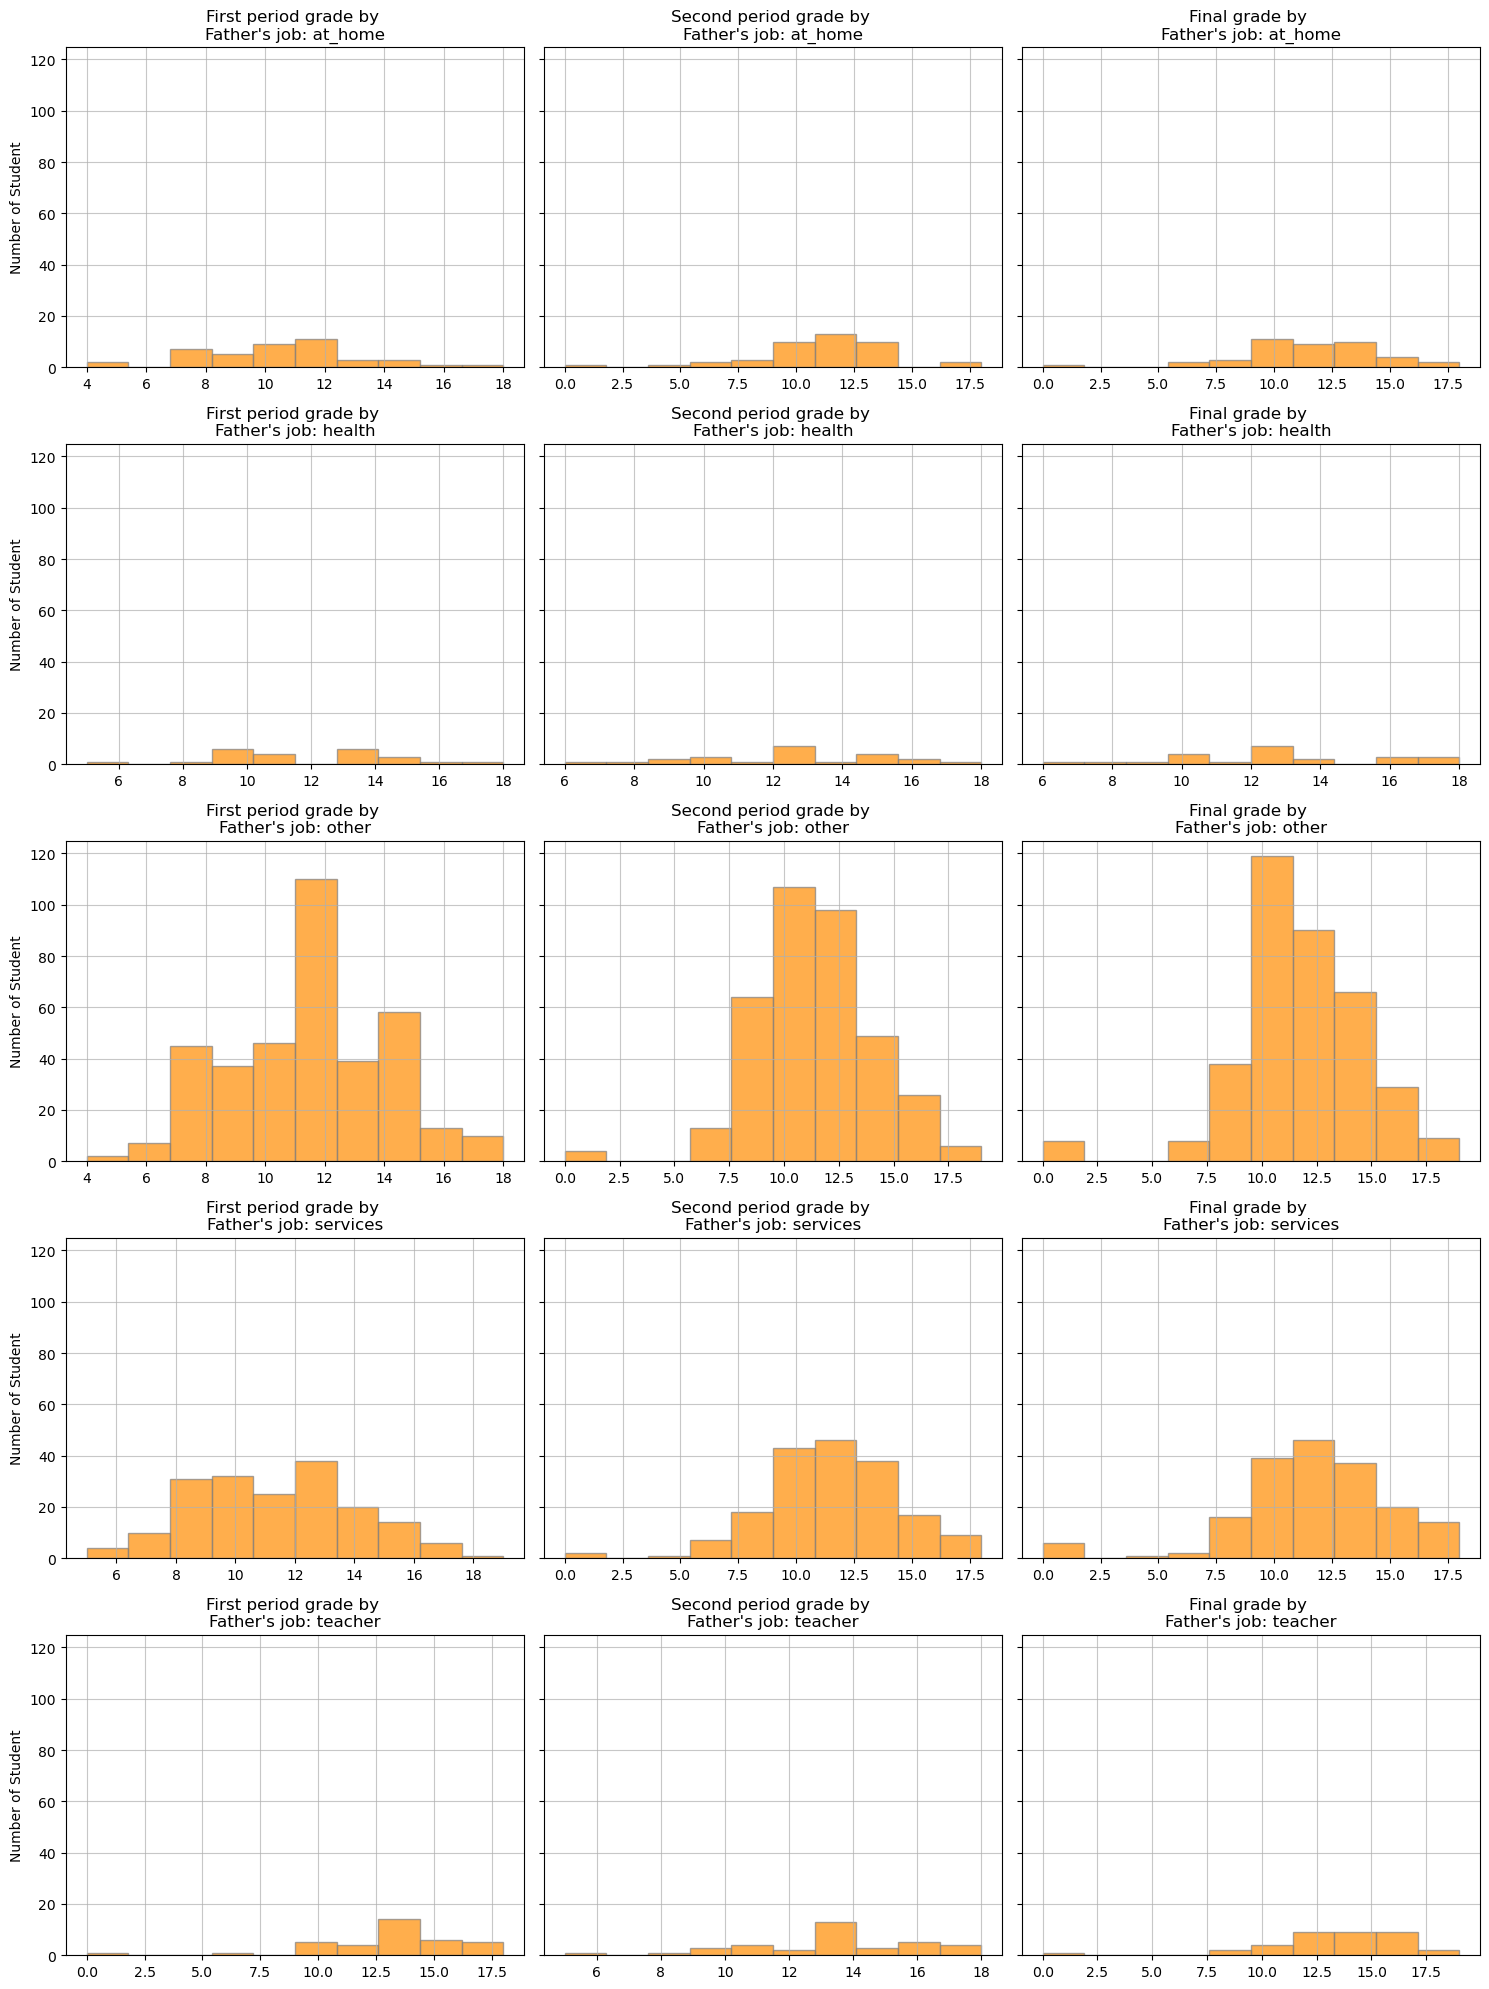

In [16]:
num_rows = 5
num_cols = 3

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20), sharey=True, tight_layout=True)
axes = axes.flatten()

i = 0
for job in MoJo:
    draw_df = Q2_df[Q2_df["Father's job"] == job]
    axes[i].set_ylabel('Number of Student')
    for grade in grade_col:
        num_bins = math.ceil(math.sqrt(draw_df[grade].nunique()))
        axes[i].hist(draw_df[grade].fillna(0),bins=10, alpha=0.7,
                     color = 'darkorange',
                     edgecolor = 'grey')
        axes[i].set_title(f"{grade} by \nFather's job: {job}")
        axes[i].grid(axis='both', linestyle='-', alpha=0.7)
        i += 1
    


From the histogram, we can conclude:

- There are no or little difference in grade based on parents' job except `teacher`. 
- Student who have parents' job is teacher seem to earn a higher grade in the subject than others as the mojority of them have the grade above 10.0.
- We can say that only parents who are `teacher`., impact on their children grading at school.

### Family education support 
This is a yes/no value column. We just need to compare grading columns based on `yes` or `no` value of this column.

In [17]:
col_needed = ["Family education support", "First period grade", 
              "Second period grade", "Final grade"]

Q3_df = df[col_needed]
Q3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Family education support  649 non-null    object
 1   First period grade        649 non-null    int64 
 2   Second period grade       649 non-null    int64 
 3   Final grade               649 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 20.4+ KB


We will reuse the histogram of grading column in the previous part:

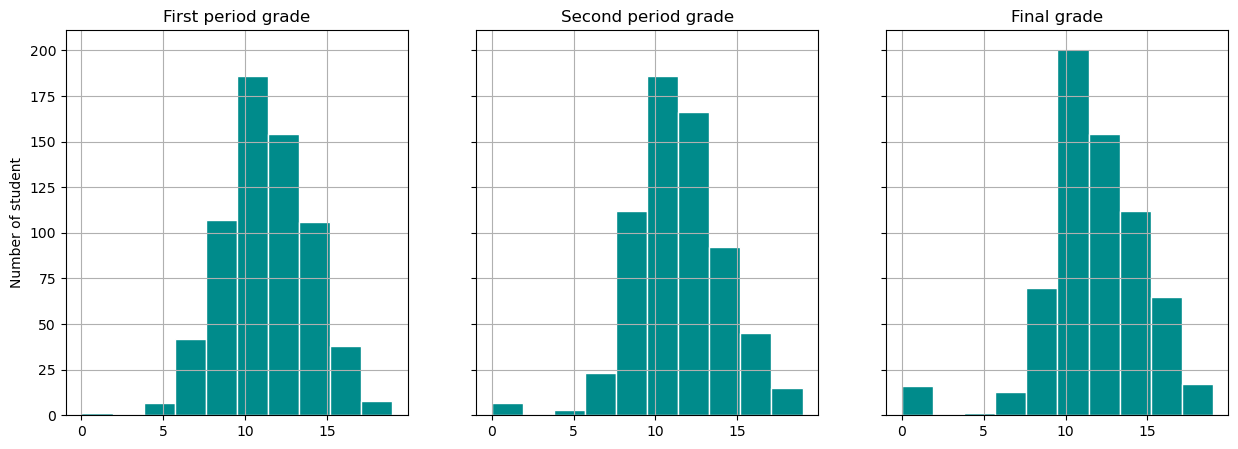

In [18]:
Q3_df[grade_col].plot(kind = 'hist', 
                        subplots = True,
                        ylabel = 'Number of student',
                        layout = (1, 3), 
                        figsize = (15, 5), 
                        bins = 10, 
                        grid = True,
                        sharey=True, 
                        sharex=False,
                        title = grade_col,
                        legend = False,
                        color =  "darkcyan",
                        edgecolor = 'white')
plt.show()

- `yes` response:

In [19]:
drawed_df = Q3_df[Q3_df["Family education support"] == 'yes']
drawed_df.head(5)

,Family education support,First period grade,Second period grade,Final grade
1,yes,9,11,11
3,yes,14,14,14
4,yes,11,13,13
5,yes,12,12,13
7,yes,10,13,13


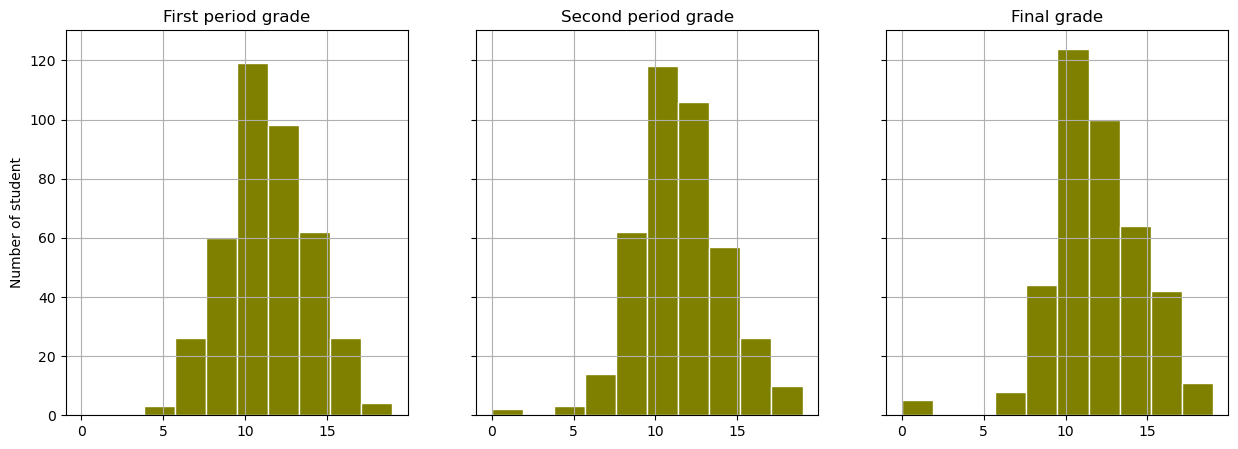

In [20]:
drawed_df[grade_col].plot(kind = 'hist', 
                        subplots = True,
                        ylabel = 'Number of student',
                        layout = (1, 3),
                        figsize = (15, 5), 
                        bins = 10,
                        grid = True,
                        sharey=True,
                        sharex=False,
                        title = grade_col,
                        legend = False,
                        color =  "olive",
                        edgecolor = 'white')
plt.show()

- `no` response:

In [21]:
drawed_df = Q3_df[Q3_df["Family education support"] == 'no']
drawed_df.head(5)

,Family education support,First period grade,Second period grade,Final grade
0,no,0,11,11
2,no,12,13,12
6,no,13,12,13
19,no,12,12,12
20,no,12,13,14


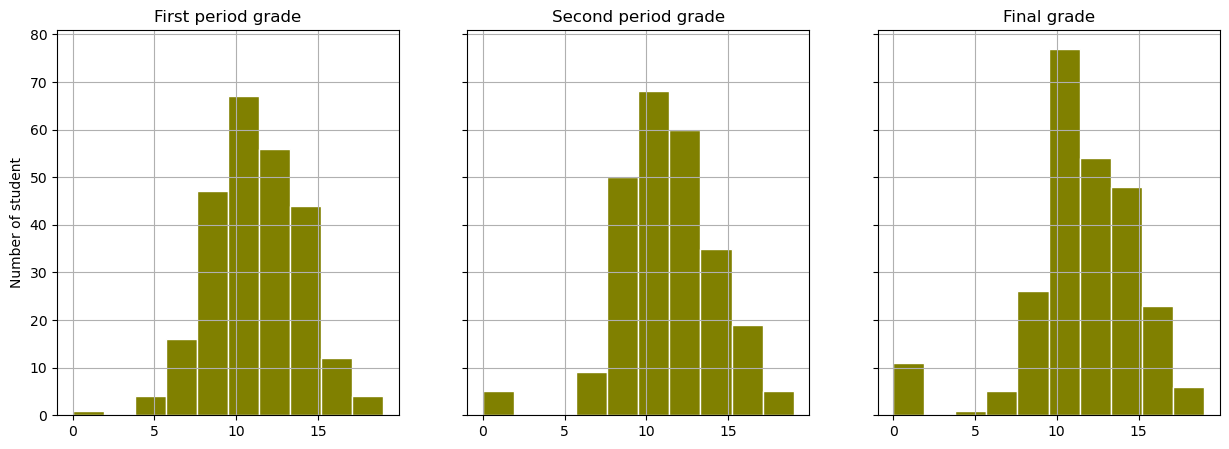

In [22]:
drawed_df[grade_col].plot(kind = 'hist', 
                        subplots = True,
                        ylabel = 'Number of student',
                        layout = (1, 3), 
                        figsize = (15, 5), 
                        bins = 10, 
                        grid = True,
                        sharey=True, 
                        sharex=False,
                        title = grade_col,
                        legend = False,
                        color =  "olive",
                        edgecolor = 'white')
plt.show()

From the charts, we can say that `Family education support` does not affect much the general trend/distribution of grading columns. 

## Numeric Columns

We will draw plots to see whether any relation between numeric columns compareed with grading columns.

In [23]:
col_needed = ["Mother's education", "Father's education",
              "First period grade", "Second period grade", "Final grade"]
Q4_df = df[col_needed]
Q4_df.head(5)

,Mother's education,Father's education,Family relationships,First period grade,Second period grade,Final grade
0,4,4,4,0,11,11
1,1,1,5,9,11,11
2,1,1,4,12,13,12
3,4,2,3,14,14,14
4,3,3,4,11,13,13


### Parents' education

#### Mother's education

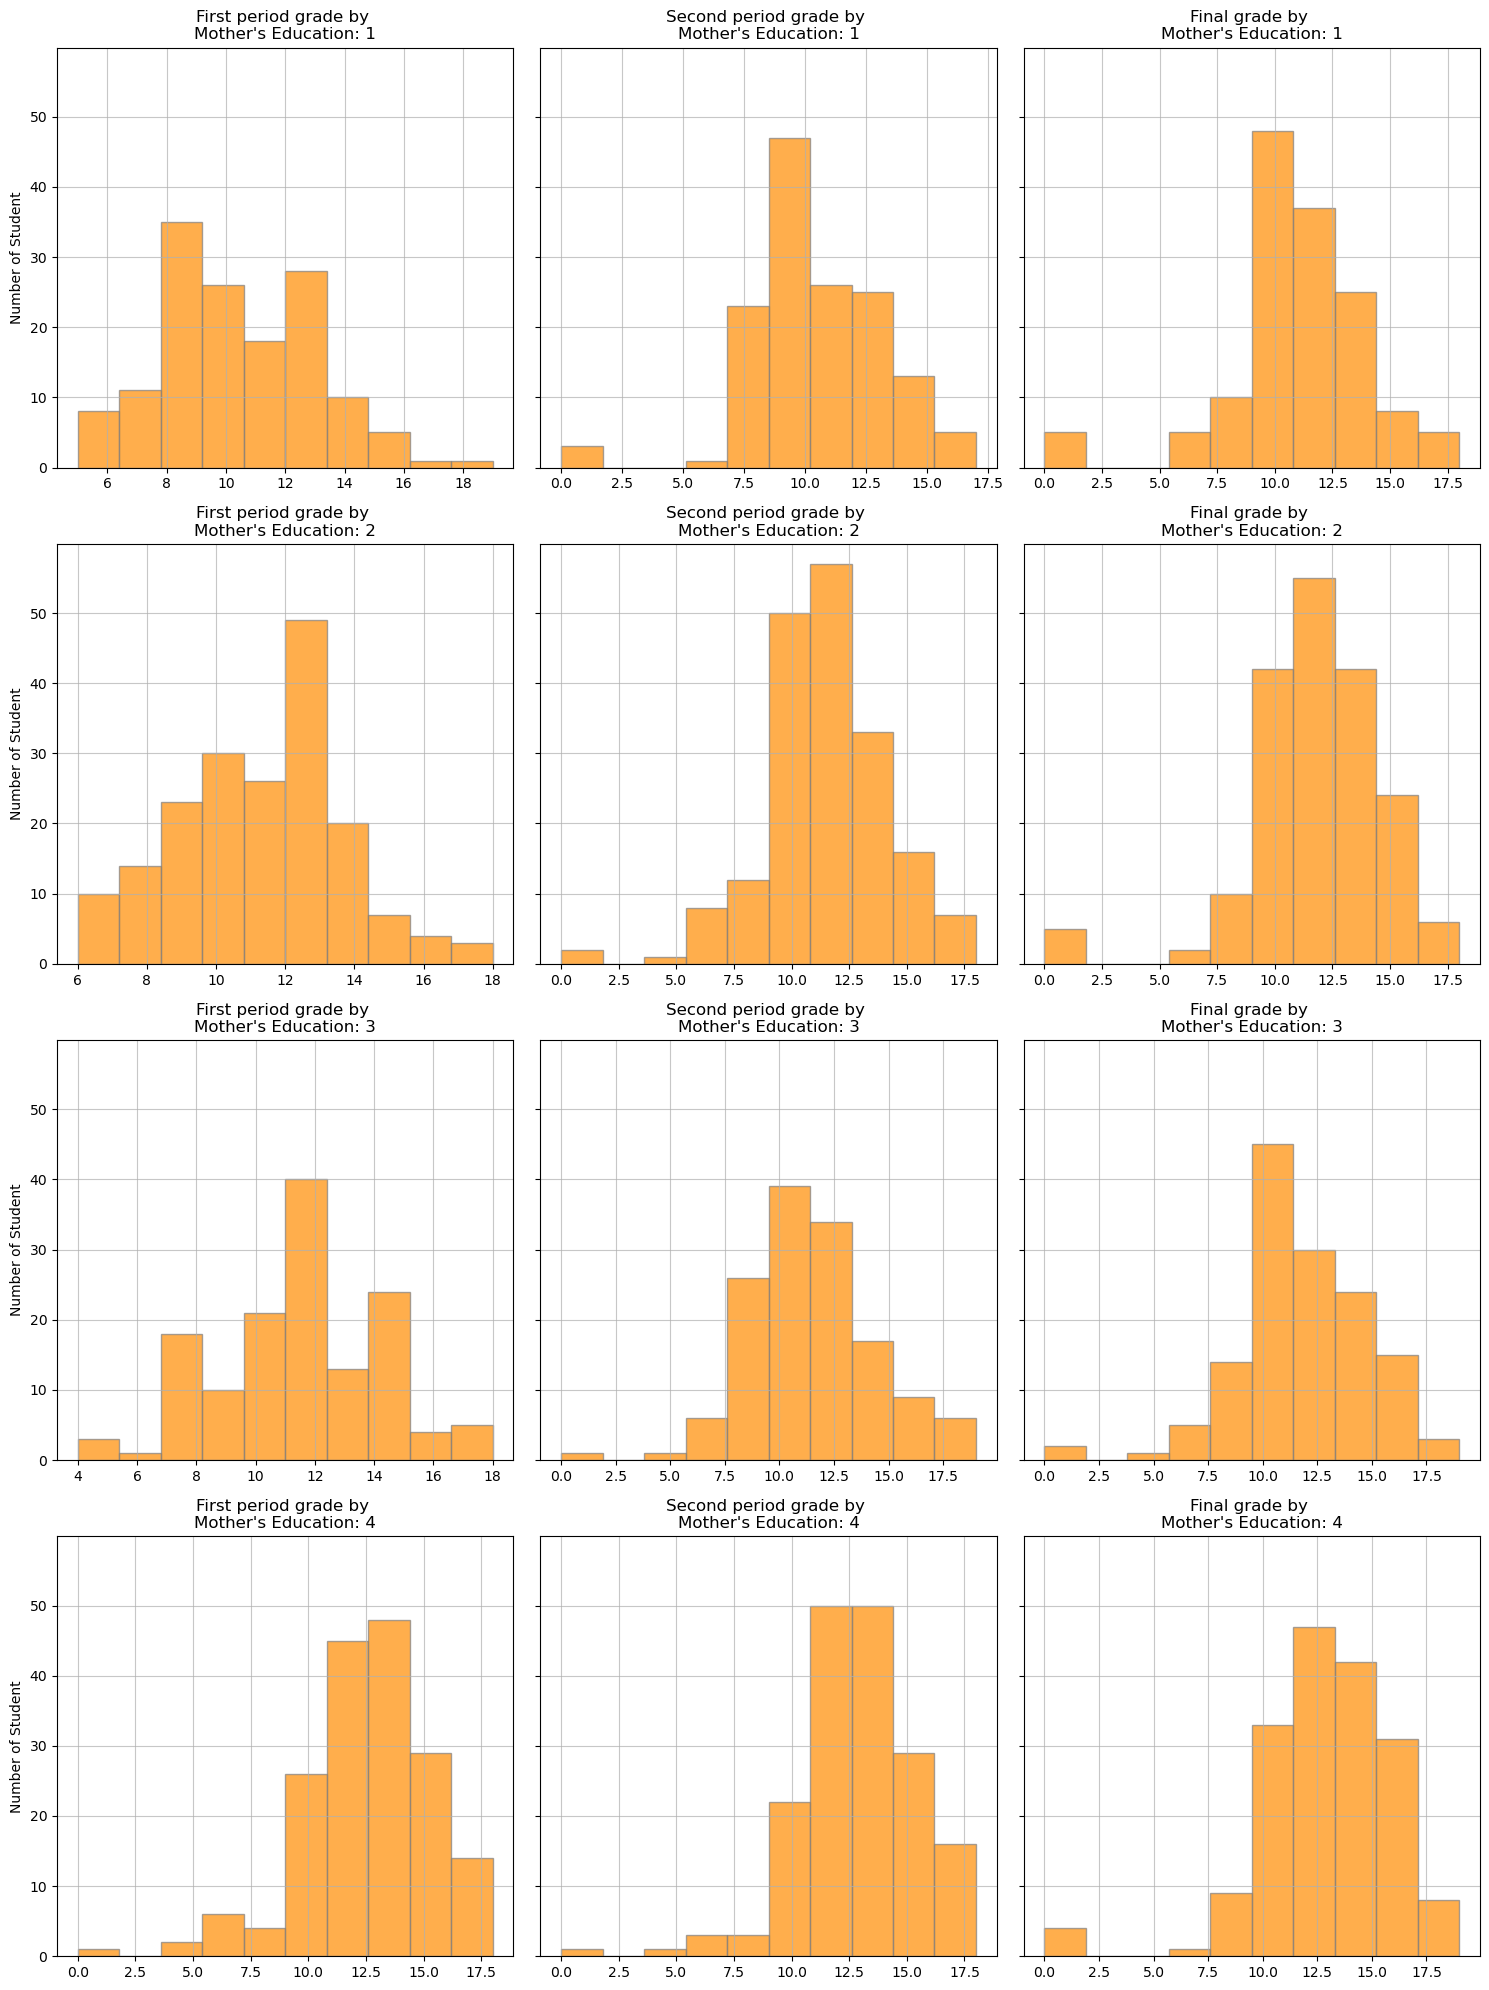

In [24]:
num_rows = 4
num_cols = 3

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20), sharey=True, tight_layout=True)
axes = axes.flatten()

i = 0
for Pts in range(1,5):
    tmp = Q4_df[Q4_df["Mother's education"] == Pts]
    axes[i].set_ylabel('Number of Student')
    for grade in grade_col:
        axes[i].hist(tmp[grade],bins=10, alpha=0.7,
                     color = 'darkorange',
                     edgecolor = 'grey')
        axes[i].set_title(f"{grade} by \nMother's Education: {Pts}")
        axes[i].grid(axis='both', linestyle='-', alpha=0.7)
        i += 1

From the chart we can slightly conclude that the higher point of `Mother's Education`, the higher score their child seems to get at school.
    
To prove the claimation above we will check for the `mean` and `mode` of grading columns along the rating of `Mother's Education`

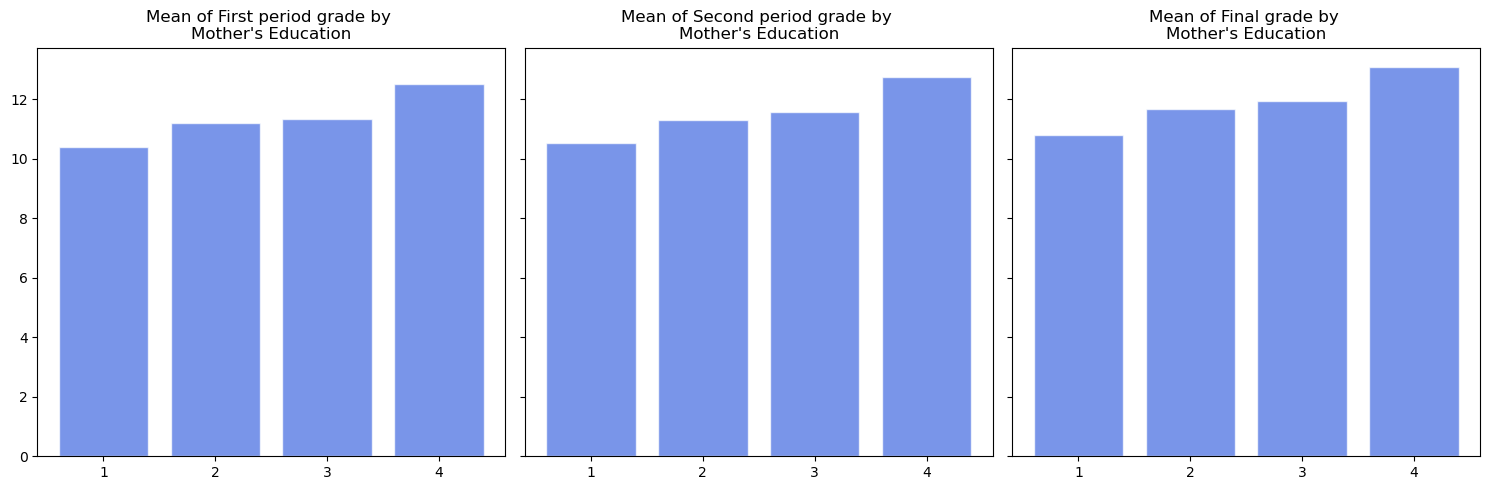

In [25]:
Edu_rate = ['1', '2', '3', '4']

num_rows = 1
num_cols = 3

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,5), sharey=True, tight_layout=True)
axes = axes.flatten()

i = 0
for grade in grade_col:
    mean_grade = []
    for pts in range(1,5):
        tmp = Q4_df[Q4_df["Mother's education"] == pts]
        mean_grade.append(tmp[grade].mean())
    axes[i].bar(Edu_rate, mean_grade, 
                color = 'royalblue',
                edgecolor = 'white', 
                alpha = 0.7)
    axes[i].set_title(f"Mean of {grade} by \nMother's Education")
    i += 1

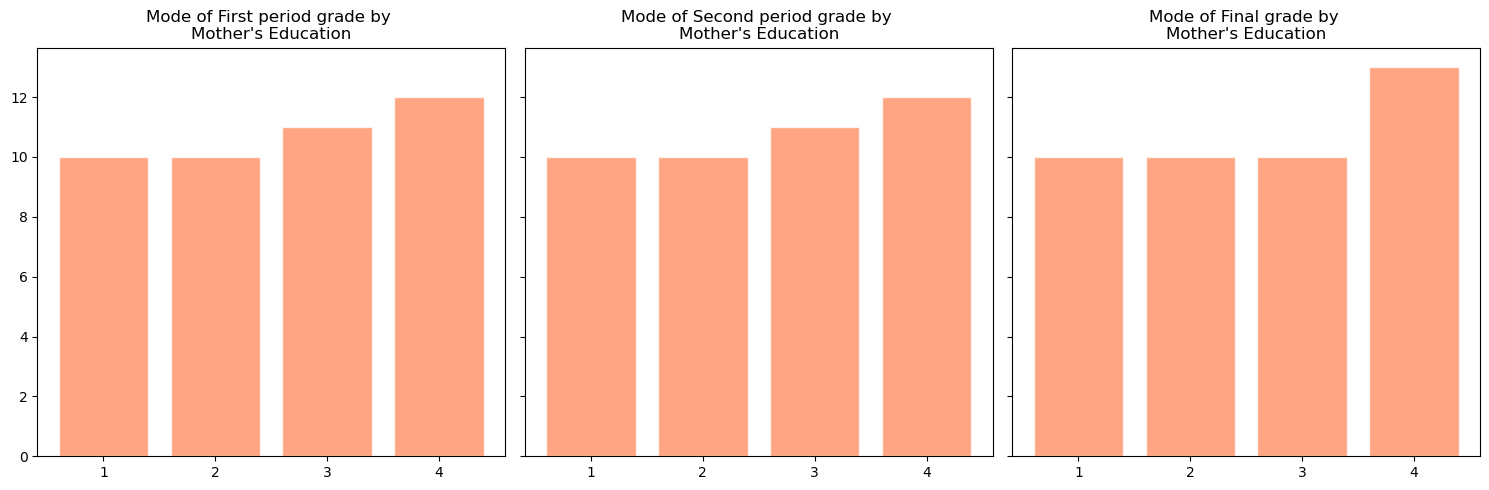

In [26]:
num_rows = 1
num_cols = 3

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,5), sharey=True, tight_layout=True)
axes = axes.flatten()

i = 0
for grade in grade_col:
    mean_grade = []
    for pts in range(1,5):
        tmp = Q4_df[Q4_df["Mother's education"] == pts]
        mean_grade.append(tmp[grade].mode()[0])
    axes[i].bar(Edu_rate, mean_grade, 
                color = 'coral',
                edgecolor = 'white', 
                alpha = 0.7)
    axes[i].set_title(f"Mode of {grade} by \nMother's Education")
    i += 1

The bar charts show that the claimation above is true, the higher educated the mother is, the higher score their child seems to claim in class.

#### Father's education

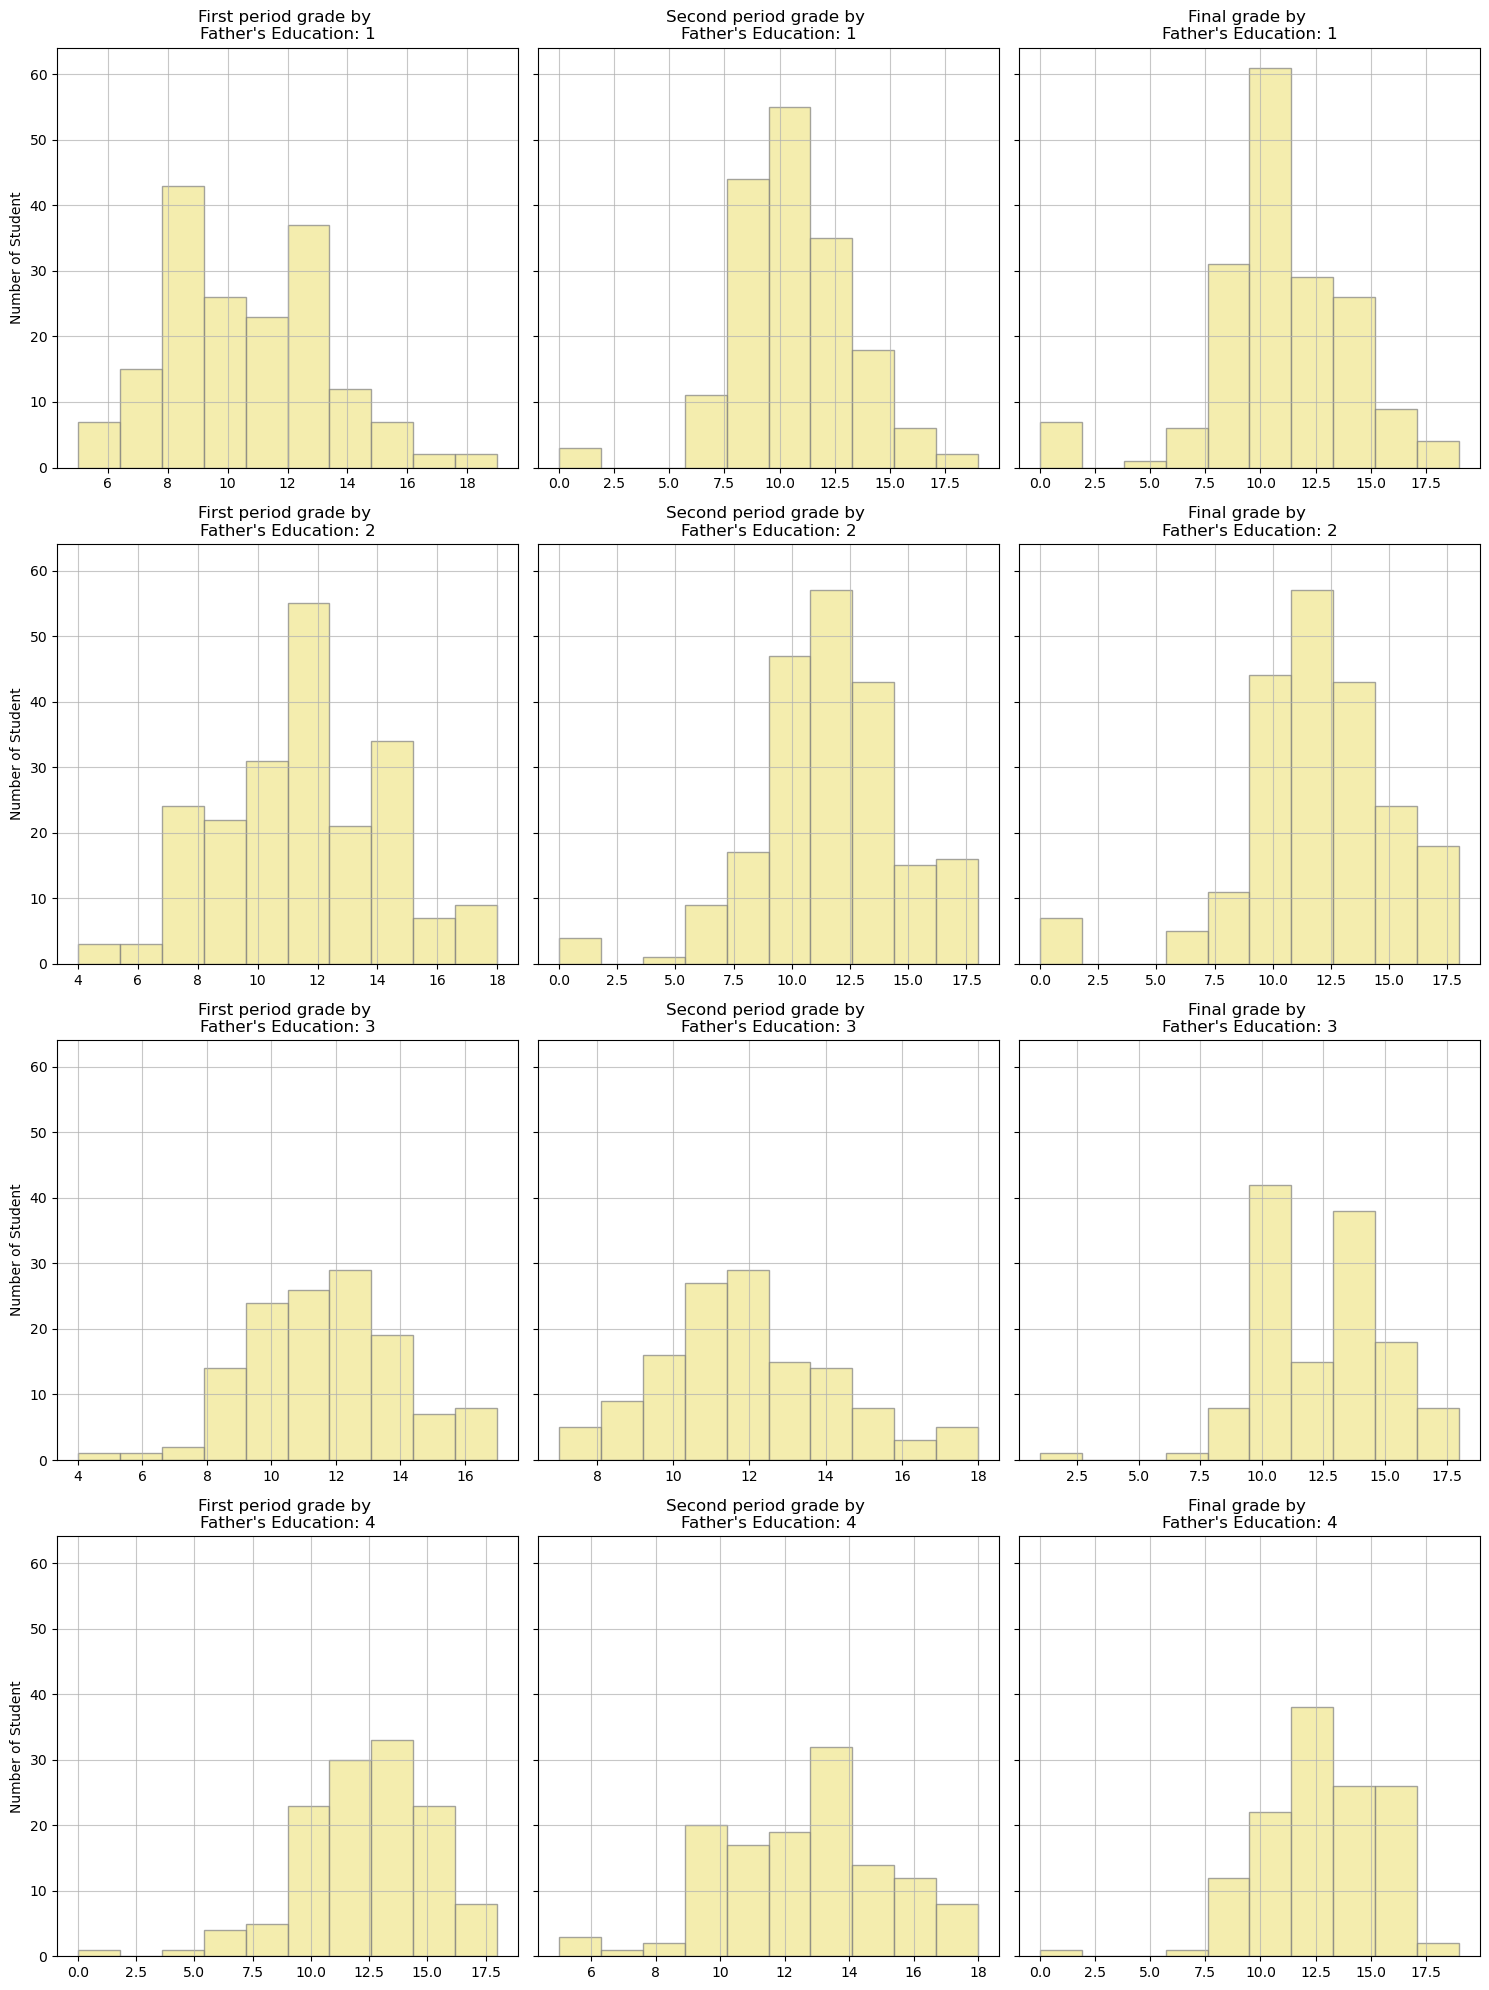

In [27]:
num_rows = 4
num_cols = 3

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20), sharey=True, tight_layout=True)
axes = axes.flatten()

i = 0
for Pts in range(1,5):
    tmp = Q4_df[Q4_df["Father's education"] == Pts]
    axes[i].set_ylabel('Number of Student')
    for grade in grade_col:
        axes[i].hist(tmp[grade],bins=10, alpha=0.7,
                     color = 'khaki',
                     edgecolor = 'grey')
        axes[i].set_title(f"{grade} by \nFather's Education: {Pts}")
        axes[i].grid(axis='both', linestyle='-', alpha=0.7)
        i += 1

It seems that we can conclude the same claimation as what we do with `Mother's education`. So we will still do some test just like what we have done with `Mother's education` to ensure our claimation.

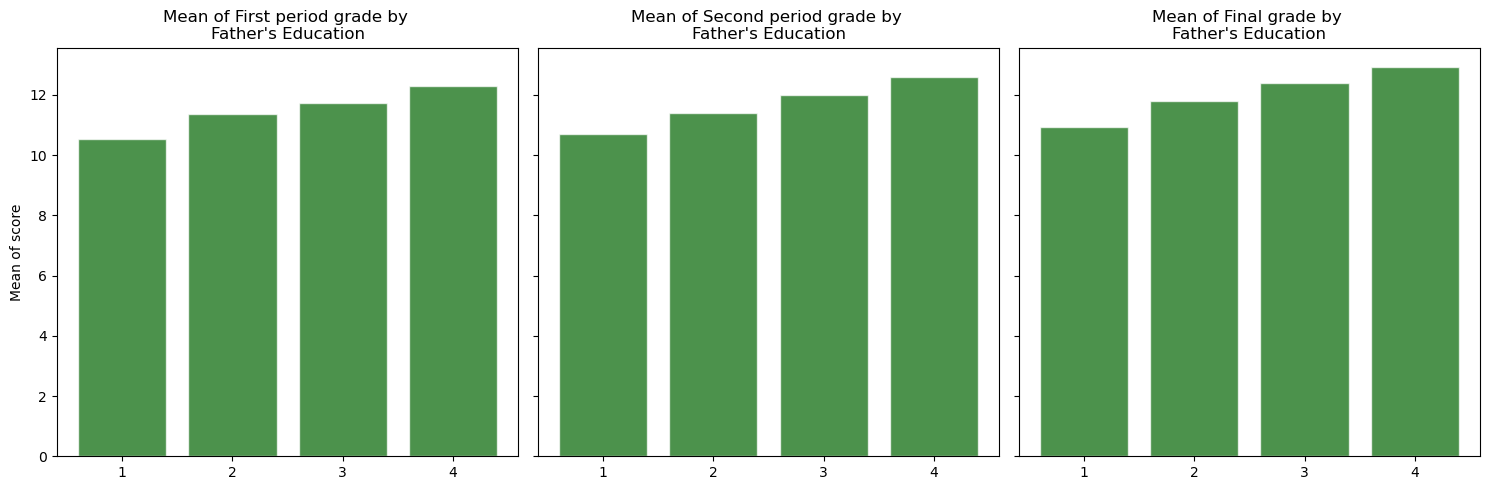

In [39]:
Edu_rate = ['1', '2', '3', '4']

num_rows = 1
num_cols = 3

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,5), sharey=True, tight_layout=True)
axes = axes.flatten()

i = 0
axes[i].set_ylabel('Mean of score')
for grade in grade_col:
    mean_grade = []
    for pts in range(1,5):
        tmp = Q4_df[Q4_df["Father's education"] == pts]
        mean_grade.append(tmp[grade].mean())
    axes[i].bar(Edu_rate, mean_grade, 
                color = 'darkgreen',
                edgecolor = 'white', 
                alpha = 0.7)
    axes[i].set_title(f"Mean of {grade} by \nFather's Education")
    i += 1

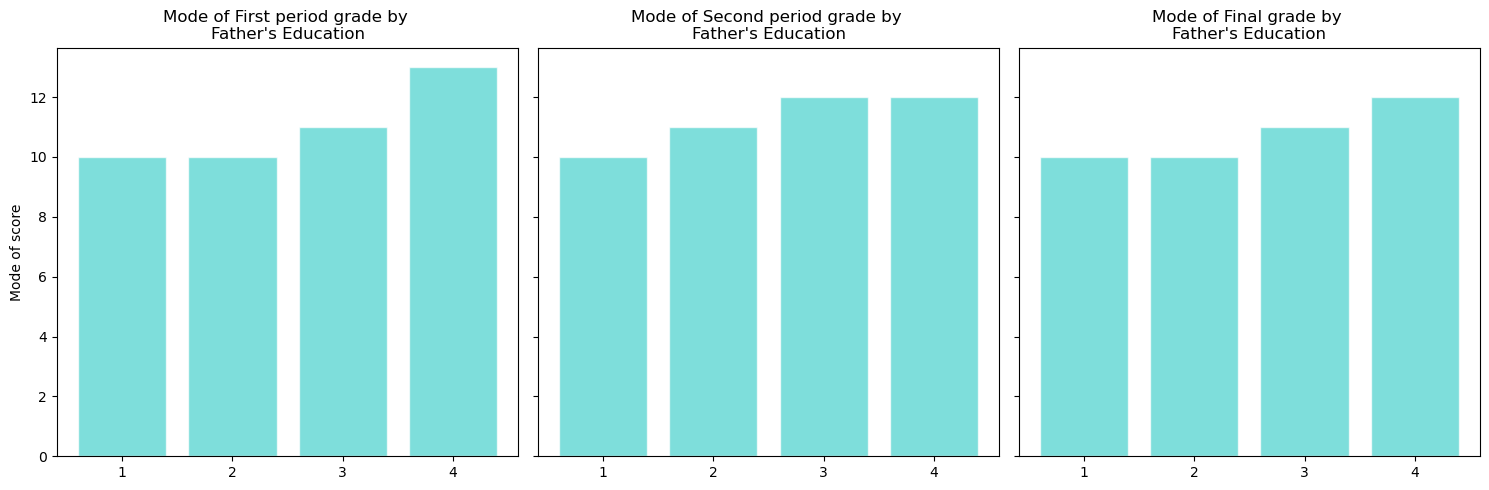

In [40]:
Edu_rate = ['1', '2', '3', '4']

num_rows = 1
num_cols = 3

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,5), sharey=True, tight_layout=True)
axes = axes.flatten()

i = 0
axes[i].set_ylabel('Mode of score')
for grade in grade_col:
    mean_grade = []
    for pts in range(1,5):
        tmp = Q4_df[Q4_df["Father's education"] == pts]
        mean_grade.append(tmp[grade].mode()[0])
    axes[i].bar(Edu_rate, mean_grade, 
                color = 'mediumturquoise',
                edgecolor = 'white', 
                alpha = 0.7)
    axes[i].set_title(f"Mode of {grade} by \nFather's Education")
    i += 1

From charts above, we can now conclude that parents' education have some impact on how their child grading at school. Meaning that, parents with higher education seem to have their child grading better at school.

### Family relationship

In [30]:
col_needed = ["Family relationships", "First period grade", "Second period grade", "Final grade"]
Q5_df = df[col_needed]
Q5_df.head(5)

,Family relationships,First period grade,Second period grade,Final grade
0,4,0,11,11
1,5,9,11,11
2,4,12,13,12
3,3,14,14,14
4,4,11,13,13


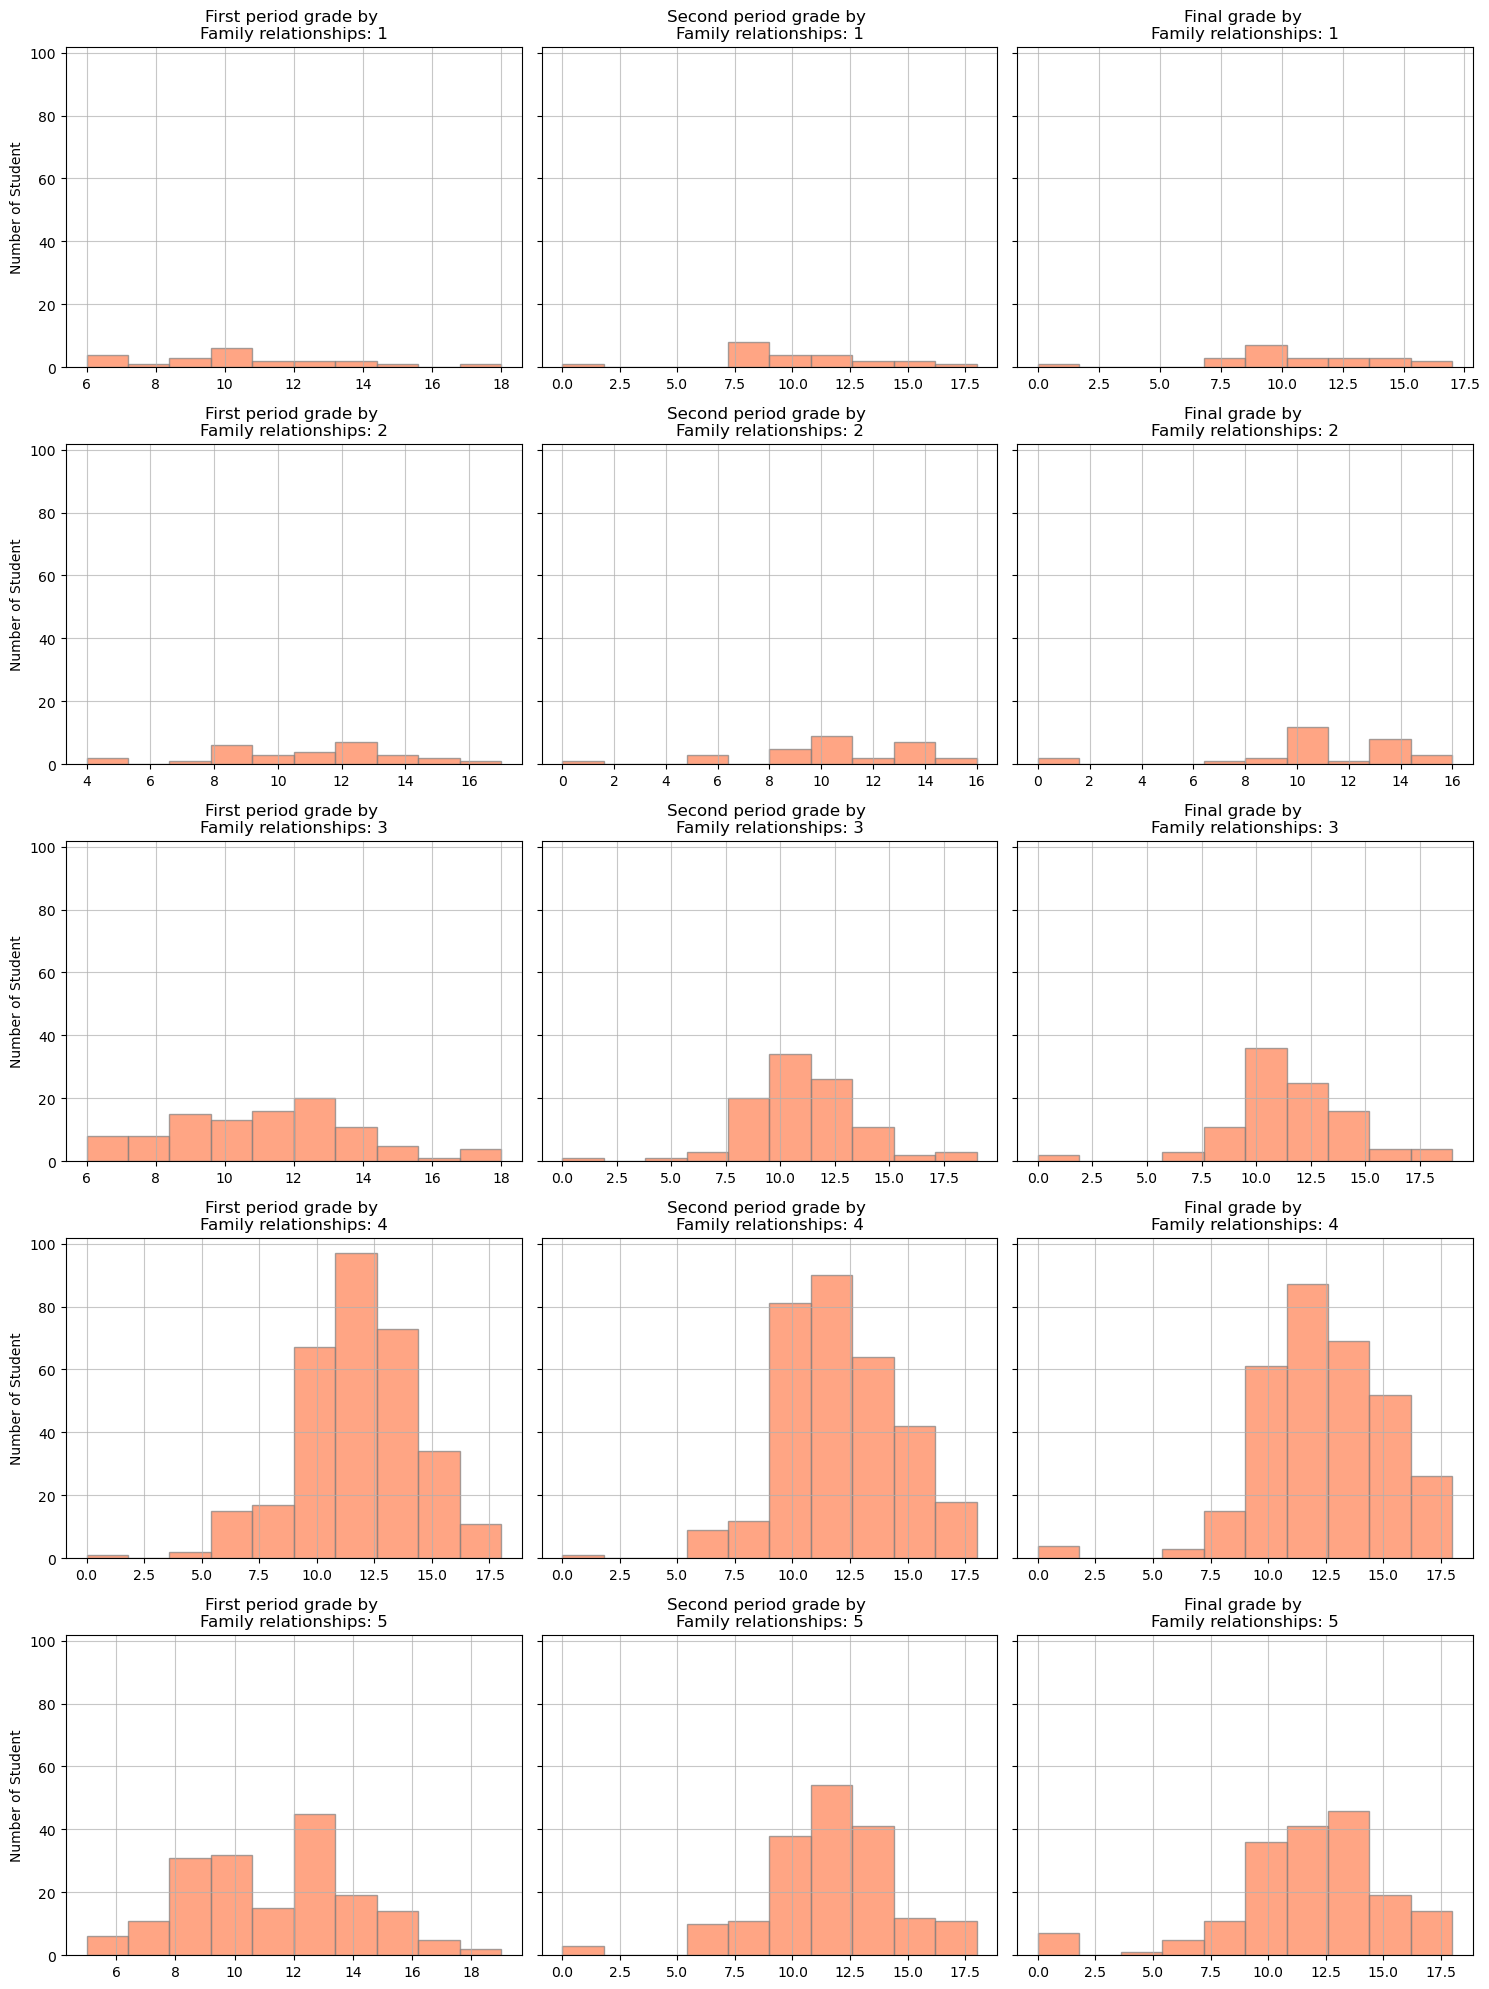

In [32]:
FamRela_rate = ['1', '2', '3', '4', '5']

num_rows = 5
num_cols = 3

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20), sharey=True, tight_layout=True)
axes = axes.flatten()

i = 0
for Pts in range(1,6):
    tmp = Q5_df[Q5_df["Family relationships"] == Pts]
    axes[i].set_ylabel('Number of Student')
    for grade in grade_col:
        axes[i].hist(tmp[grade],bins=10, alpha=0.7,
                     color = 'coral',
                     edgecolor = 'grey')
        axes[i].set_title(f"{grade} by \nFamily relationships: {Pts}")
        axes[i].grid(axis='both', linestyle='-', alpha=0.7)
        i += 1

From the charts above, they seem that those charts have the same pattern as the general charts of `First period`, `Second period` and `Final` grade charts at the top of this file. However, when we look in detailed at the charts above, they show us the higher rate of `Family relationship`, the higher point student in that family seeems to get.

To ensure the claimation above, we will look for the `mean` and the `mode` of these grading columns group by `Family relationship` like other columns.

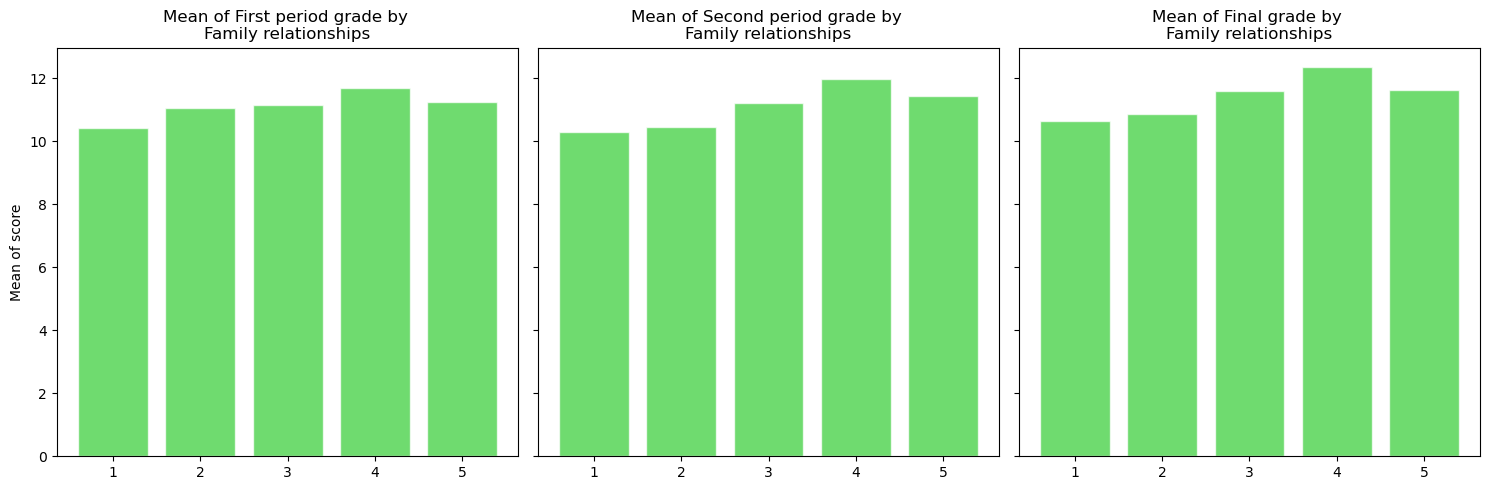

In [42]:
num_rows = 1
num_cols = 3

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,5), sharey=True, tight_layout=True)
axes = axes.flatten()

i = 0
axes[i].set_ylabel('Mean of score')
for grade in grade_col:
    mean_grade = []
    for pts in range(1,6):
        tmp = Q5_df[Q5_df["Family relationships"] == pts]
        mean_grade.append(tmp[grade].mean())
    axes[i].bar(FamRela_rate, mean_grade, 
                color = 'limegreen',
                edgecolor = 'white', 
                alpha = 0.7)
    axes[i].set_title(f"Mean of {grade} by \nFamily relationships")
    i += 1

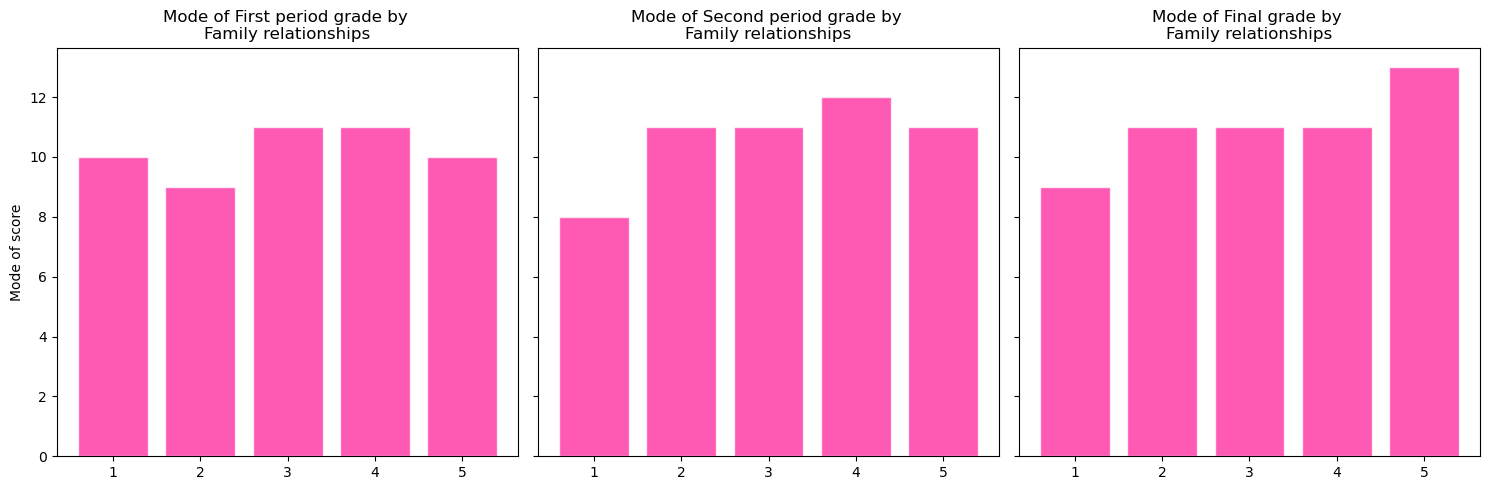

In [44]:
num_rows = 1
num_cols = 3

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,5), sharey=True, tight_layout=True)
axes = axes.flatten()

i = 0
axes[i].set_ylabel('Mode of score')
for grade in grade_col:
    mode_grade = []
    for pts in range(1,6):
        tmp = Q5_df[Q5_df["Family relationships"] == pts]
        mode_grade.append(tmp[grade].mode()[0])
    axes[i].bar(FamRela_rate, mode_grade, 
                color = 'deeppink',
                edgecolor = 'white', 
                alpha = 0.7)
    axes[i].set_title(f"Mode of {grade} by \nFamily relationships")
    i += 1

As the bar charts above show `mean` and `mode` of grading columns group by `Family relationships`. It is clear that `mean` and `mode` value of each grading column with higher `Family relationships` point are greater than the lower one. Overall we can ensure the claimation that the higher `Family relationships` rate is, the higher score the students seem to gain.

# Conclusion

- Student who have parents' job is teacher seem to earn a higher grade in the subject than others.
- Parents with higher education seem to have their child grading in this subject better at school.
- The higher `Family relationships` rate is, the higher score the students seem to gain.